# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#declare variables
api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
city_data = []
repCounter = 1
setCounter = 1

#for loop to loop through cities list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        setCounter += 1
        repCounter = 0

    # Build query URL
    query_url = url + api_key + "&q=" + city
    
    #Status block
    print(f"Test: {repCounter} of Group: {setCounter} City: {city}")
    #increment
    repCounter += 1

    #Exception Handling block
    try:
        city_weather = requests.get(query_url).json()
        
        #Traverse JSON and store into variables for comparison
        # * Temperature (F) vs. Latitude
        # * Humidity (%) vs. Latitude
        # * Cloudiness (%) vs. Latitude
        # * Wind Speed (mph) vs. Latitude
        maxTemp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        windSpeed = city_weather["wind"]["speed"]
        lat = city_weather["coord"]["lat"]

        #Append all items to the empty array
        city_data.append({"City": city,
                          "Latitude": lat,
                          "Temp": maxTemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": windSpeed})

        #Turn array into dataframe
        #city_data_df = pd.DataFrame(city_data)

        #Display dataframe
        #city_data_df
        
    except:
        print("Oops, that city isn't in the list.")
        pass

    # "Catching" the error lets the rest of our code execute
    # print("Continuing")
print("Completed")

Test: 1 of Group: 1 City: kodiak
Test: 2 of Group: 1 City: saskylakh
Test: 3 of Group: 1 City: rikitea
Test: 4 of Group: 1 City: porto novo
Test: 5 of Group: 1 City: ushuaia
Test: 6 of Group: 1 City: zharkent
Test: 7 of Group: 1 City: itarema
Test: 8 of Group: 1 City: makat
Test: 9 of Group: 1 City: qaanaaq
Test: 10 of Group: 1 City: bethel
Test: 11 of Group: 1 City: santa rosa
Test: 12 of Group: 1 City: punta arenas
Test: 13 of Group: 1 City: belushya guba
Oops, that city isn't in the list.
Test: 14 of Group: 1 City: gusau
Test: 15 of Group: 1 City: carutapera
Test: 16 of Group: 1 City: buala
Test: 17 of Group: 1 City: pucallpa
Test: 18 of Group: 1 City: bredasdorp
Test: 19 of Group: 1 City: mujiayingzi
Test: 20 of Group: 1 City: bambous virieux
Test: 21 of Group: 1 City: kuusamo
Test: 22 of Group: 1 City: yellowknife
Test: 23 of Group: 1 City: rungata
Oops, that city isn't in the list.
Test: 24 of Group: 1 City: kiunga
Test: 25 of Group: 1 City: ancud
Test: 26 of Group: 1 City: raude

Test: 4 of Group: 5 City: burley
Test: 5 of Group: 5 City: port elizabeth
Test: 6 of Group: 5 City: lempaala
Test: 7 of Group: 5 City: souillac
Test: 8 of Group: 5 City: sechura
Test: 9 of Group: 5 City: sao luiz gonzaga
Test: 10 of Group: 5 City: ati
Test: 11 of Group: 5 City: tevaitoa
Test: 12 of Group: 5 City: avera
Test: 13 of Group: 5 City: kabare
Test: 14 of Group: 5 City: pimentel
Test: 15 of Group: 5 City: virginia beach
Test: 16 of Group: 5 City: asau
Oops, that city isn't in the list.
Test: 17 of Group: 5 City: nemuro
Test: 18 of Group: 5 City: petropavlovsk-kamchatskiy
Test: 19 of Group: 5 City: barrow
Test: 20 of Group: 5 City: potchefstroom
Test: 21 of Group: 5 City: seymchan
Test: 22 of Group: 5 City: moranbah
Test: 23 of Group: 5 City: belmonte
Test: 24 of Group: 5 City: chokurdakh
Test: 25 of Group: 5 City: sfantu gheorghe
Test: 26 of Group: 5 City: flin flon
Test: 27 of Group: 5 City: vanderhoof
Test: 28 of Group: 5 City: skagastrond
Oops, that city isn't in the list.


Test: 14 of Group: 9 City: cabedelo
Test: 15 of Group: 9 City: sembakung
Test: 16 of Group: 9 City: knysna
Test: 17 of Group: 9 City: ust-kuyga
Test: 18 of Group: 9 City: jacareacanga
Test: 19 of Group: 9 City: port hawkesbury
Test: 20 of Group: 9 City: samfya
Test: 21 of Group: 9 City: pochutla
Test: 22 of Group: 9 City: phuthaditjhaba
Test: 23 of Group: 9 City: ketchikan
Test: 24 of Group: 9 City: talalayivka
Test: 25 of Group: 9 City: berdigestyakh
Test: 26 of Group: 9 City: boa vista
Test: 27 of Group: 9 City: garowe
Test: 28 of Group: 9 City: orlik
Test: 29 of Group: 9 City: port ellen
Oops, that city isn't in the list.
Test: 30 of Group: 9 City: buguruslan
Test: 31 of Group: 9 City: bafra
Oops, that city isn't in the list.
Test: 32 of Group: 9 City: maubin
Test: 33 of Group: 9 City: doctor pedro p. pena
Oops, that city isn't in the list.
Test: 34 of Group: 9 City: quatre cocos
Test: 35 of Group: 9 City: monzon
Test: 36 of Group: 9 City: urubicha
Test: 37 of Group: 9 City: bamiant

Oops, that city isn't in the list.
Test: 14 of Group: 13 City: rorvik
Test: 15 of Group: 13 City: tambopata
Oops, that city isn't in the list.
Test: 16 of Group: 13 City: cervo
Test: 17 of Group: 13 City: stephenville
Test: 18 of Group: 13 City: camacupa
Test: 19 of Group: 13 City: pokhara
Test: 20 of Group: 13 City: vitim
Test: 21 of Group: 13 City: brae
Test: 22 of Group: 13 City: bukama
Test: 23 of Group: 13 City: suntar
Test: 24 of Group: 13 City: teofilo otoni
Test: 25 of Group: 13 City: surok
Test: 26 of Group: 13 City: karakendzha
Oops, that city isn't in the list.
Completed


In [4]:
#Display JSON
city_weather

{'cod': '404', 'message': 'city not found'}

In [5]:
#Turn array into dataframe
city_data_df = pd.DataFrame(city_data)

#Display dataframe
city_data_df

,City,Cloudiness,Humidity,Latitude,Temp,Wind Speed
0,kodiak,1,45,39.95,26.60,6.93
1,saskylakh,44,64,71.97,-34.80,3.29
2,rikitea,48,100,-23.12,79.42,15.26
3,porto novo,40,66,-23.68,86.00,16.11
4,ushuaia,40,47,-54.81,60.80,18.34
5,zharkent,12,54,44.17,-4.15,0.60
6,itarema,8,65,-2.92,83.33,12.46
7,makat,8,56,47.65,-4.83,6.53
8,qaanaaq,0,100,77.48,-20.98,7.87
9,bethel,90,100,60.79,37.94,19.46


In [6]:
df_lat = city_data_df["Latitude"]
df_maxTemp = city_data_df["Temp"]
df_humidity = city_data_df["Humidity"]
df_cloudiness = city_data_df["Cloudiness"]
df_windSpeed = city_data_df["Wind Speed"]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\Jimmy\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


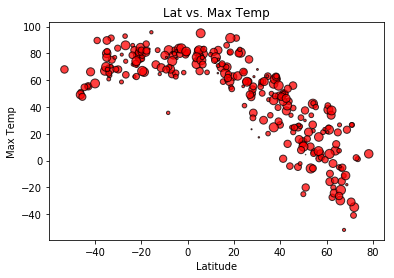

<Figure size 432x288 with 0 Axes>

In [7]:
#Lat vs. Temp Scatter

plt.scatter(df_lat, df_maxTemp, marker="o", facecolors="red", edgecolors="black",
            s=lats, alpha=0.75)

plt.title("Lat vs. Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

#Display and save
plt.show()
plt.savefig("output_data/Fig1.png")

#### Latitude vs. Humidity Plot

C:\Users\Jimmy\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


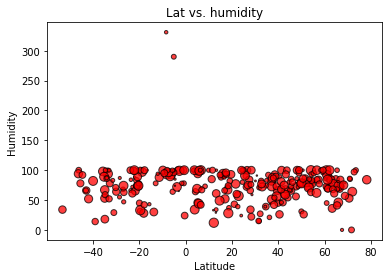

<Figure size 432x288 with 0 Axes>

In [8]:
#Lat vs. Humidity Scatter
plt.scatter(df_lat, df_humidity, marker="o", facecolors="red", edgecolors="black",
            s=lats, alpha=0.75)

plt.title("Lat vs. humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#Display and save
plt.show()
plt.savefig("output_data/Fig2.png")

#### Latitude vs. Cloudiness Plot

C:\Users\Jimmy\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


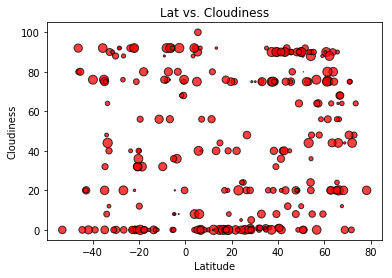

<Figure size 432x288 with 0 Axes>

In [9]:
#Lat vs. Cloudiness Scatter
plt.scatter(df_lat, df_cloudiness, marker="o", facecolors="red", edgecolors="black",
            s=lats, alpha=0.75)

plt.title("Lat vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#Display and save
plt.show()
plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

C:\Users\Jimmy\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


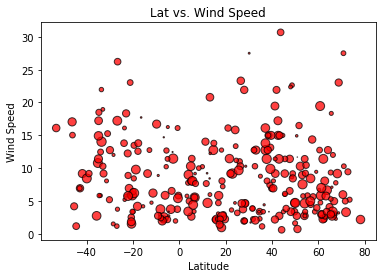

<Figure size 432x288 with 0 Axes>

In [10]:
#Lat vs. Wind Speed Scatter
plt.scatter(df_lat, df_windSpeed, marker="o", facecolors="red", edgecolors="black",
            s=lats, alpha=0.75)

plt.title("Lat vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

#Display and save
plt.show()
plt.savefig("output_data/Fig4.png")